In [1]:

import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [4]:
df = pd.read_csv('loan_train.csv')
df.head(3)

Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0           0             0     PAIDOFF       1000     30       9/8/2016   
1           2             2     PAIDOFF       1000     30       9/8/2016   
2           3             3     PAIDOFF       1000     15       9/8/2016   

    due_date  age             education  Gender  
0  10/7/2016   45  High School or Below    male  
1  10/7/2016   33              Bechalor  female  
2  9/22/2016   27               college    male

In [5]:

df.shape

(346, 10)

In [6]:

df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head(3)

Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0           0             0     PAIDOFF       1000     30     2016-09-08   
1           2             2     PAIDOFF       1000     30     2016-09-08   
2           3             3     PAIDOFF       1000     15     2016-09-08   

    due_date  age             education  Gender  
0 2016-10-07   45  High School or Below    male  
1 2016-10-07   33              Bechalor  female  
2 2016-09-22   27               college    male

In [7]:
print(df['loan_status'].value_counts())
print(df['education'].value_counts())

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64
High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64


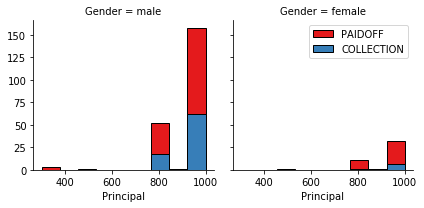

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

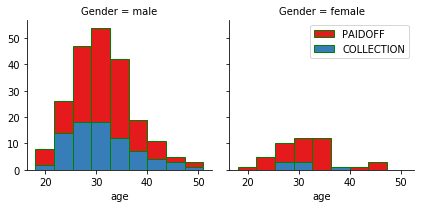

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="g")

g.axes[-1].legend()
plt.show

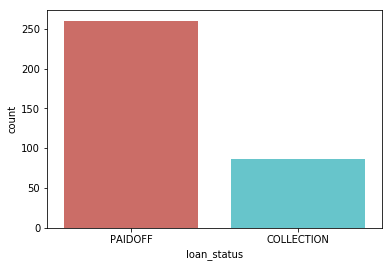

In [10]:
countplt=sns.countplot(x='loan_status', data=df, palette ='hls')

plt.show()

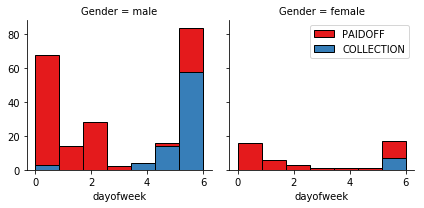

In [11]:
df['dayofweek'] = df['effective_date'].dt.dayofweek 
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 8)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [12]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head(4)

Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0           0             0     PAIDOFF       1000     30     2016-09-08   
1           2             2     PAIDOFF       1000     30     2016-09-08   
2           3             3     PAIDOFF       1000     15     2016-09-08   
3           4             4     PAIDOFF       1000     30     2016-09-09   

    due_date  age             education  Gender  dayofweek  weekend  
0 2016-10-07   45  High School or Below    male          3        0  
1 2016-10-07   33              Bechalor  female          3        0  
2 2016-09-22   27               college    male          3        0  
3 2016-10-08   28               college  female          4        1

In [13]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [14]:

df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True) # 0 for male and 1 for female
df.head(4)

Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0           0             0     PAIDOFF       1000     30     2016-09-08   
1           2             2     PAIDOFF       1000     30     2016-09-08   
2           3             3     PAIDOFF       1000     15     2016-09-08   
3           4             4     PAIDOFF       1000     30     2016-09-09   

    due_date  age             education  Gender  dayofweek  weekend  
0 2016-10-07   45  High School or Below       0          3        0  
1 2016-10-07   33              Bechalor       1          3        0  
2 2016-09-22   27               college       0          3        0  
3 2016-10-08   28               college       1          4        1

In [15]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [16]:
df[['Principal','terms','age','Gender','education']].head()

Principal  terms  age  Gender             education
0       1000     30   45       0  High School or Below
1       1000     30   33       1              Bechalor
2       1000     15   27       0               college
3       1000     30   28       1               college
4       1000     30   29       0               college

In [17]:

Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
#Feature.tail(20)
Feature.drop(['Master or Above'], axis = 1,inplace=True)# only two people with Master and above, so drop it 
#Feature.head(4)
#new_Feature = pd.concat([Feature, ]) 
print (type(Feature))

<class 'pandas.core.frame.DataFrame'>


In [21]:
X = Feature
X[0:5]

Principal  terms  age  Gender  weekend  Bechalor  High School or Below  \
0       1000     30   45       0        0         0                     1   
1       1000     30   33       1        0         1                     0   
2       1000     15   27       0        0         0                     0   
3       1000     30   28       1        1         0                     0   
4       1000     30   29       0        1         0                     0   

   college  
0        0  
1        0  
2        1  
3        1  
4        1

In [22]:
df_n = df.loan_status.replace(to_replace=['PAIDOFF', 'COLLECTION'], value=[0,1])
print (df_n.head(3))
y = df_n.values
print ("labels type: ", type(y))
y[0:5]

0    0
1    0
2    0
Name: loan_status, dtype: int64
labels type:  <class 'numpy.ndarray'>


array([0, 0, 0, 0, 0], dtype=int64)

In [23]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

C:\Users\Jaypal Chauhan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Jaypal Chauhan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=30)
print ("Training features shape:", X_train.shape)
print ("test features shape: ", X_test.shape)
print ("training labels shape: ", Y_train.shape)

Training features shape: (259, 8)
test features shape:  (87, 8)
training labels shape:  (259,)


In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
kneighbor = KNeighborsClassifier(n_neighbors=7)
kneighbor.fit(X_train, Y_train)
y_hat = kneighbor.predict(X_test)

In [30]:
from sklearn import metrics # jaccard score and f1 score
print("Train set Accuracy (Jaccard): ", metrics.accuracy_score(Y_train, kneighbor.predict(X_train)))
print("Test set Accuracy (Jaccard): ", metrics.accuracy_score(Y_test, y_hat))

print("Train set Accuracy (F1): ", metrics.f1_score(Y_train, kneighbor.predict(X_train)))
print("Test set Accuracy (F1): ", metrics.f1_score(Y_test, y_hat))

Train set Accuracy (Jaccard):  0.7722007722007722
Test set Accuracy (Jaccard):  0.8620689655172413
Train set Accuracy (F1):  0.5426356589147286
Test set Accuracy (F1):  0.6


In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
loanTree.fit(X_train, Y_train)
y_hat_LTr = loanTree.predict(X_test)

In [33]:
print("Train set Accuracy (Jaccard): ", metrics.jaccard_similarity_score(Y_train, loanTree.predict(X_train)))
print("Test set Accuracy (Jaccard): ", metrics.jaccard_similarity_score(Y_test, y_hat_LTr))

print("Train set Accuracy (F1): ", metrics.f1_score(Y_train, loanTree.predict(X_train)))
print("Test set Accuracy (F1): ", metrics.f1_score(Y_test, y_hat_LTr))

Train set Accuracy (Jaccard):  0.7837837837837838
Test set Accuracy (Jaccard):  0.735632183908046
Train set Accuracy (F1):  0.5483870967741935
Test set Accuracy (F1):  0.34285714285714286


In [34]:
from sklearn import svm
clf1 = svm.SVC(kernel='rbf', gamma=0.7)

In [35]:
clf1.fit(X_train, Y_train) 
y_hat_SVM = clf1.predict(X_test)

In [36]:
print("Train set Accuracy (Jaccard): ", metrics.jaccard_similarity_score(Y_train, clf1.predict(X_train)))
print("Test set Accuracy (Jaccard): ", metrics.jaccard_similarity_score(Y_test, y_hat_SVM))

print("Train set Accuracy (F1): ", metrics.f1_score(Y_train, clf1.predict(X_train)))
print("Test set Accuracy (F1): ", metrics.f1_score(Y_test, y_hat_SVM))

Train set Accuracy (Jaccard):  0.7876447876447876
Test set Accuracy (Jaccard):  0.7701149425287356
Train set Accuracy (F1):  0.4859813084112149
Test set Accuracy (F1):  0.16666666666666669


In [37]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.001, solver='liblinear').fit(X_train,Y_train)#libilinear is good for small data-set

In [38]:
y_hat_LR = LR.predict(X_test)

from sklearn.metrics import jaccard_similarity_score
print ("Jaccard score: ", jaccard_similarity_score(Y_test, y_hat_LR))

print("Train set Accuracy (F1): ", metrics.f1_score(Y_train, LR.predict(X_train)))
print("Test set Accuracy (F1): ", metrics.f1_score(Y_test, y_hat_LR))

Jaccard score:  0.8275862068965517
Train set Accuracy (F1):  0.41666666666666663
Test set Accuracy (F1):  0.4827586206896552


In [39]:
from sklearn.metrics import log_loss

y_hat_prob1_LR = LR.predict_proba(X_test)
print ("Log loss score: ", log_loss(Y_test, y_hat_prob1_LR))

Log loss score:  0.6679306006663686


In [40]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [42]:
test_df = pd.read_csv('loan_test.csv')
test_df.head(6)

Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0           1             1     PAIDOFF       1000     30       9/8/2016   
1           5             5     PAIDOFF        300      7       9/9/2016   
2          21            21     PAIDOFF       1000     30      9/10/2016   
3          24            24     PAIDOFF       1000     30      9/10/2016   
4          35            35     PAIDOFF        800     15      9/11/2016   
5          37            37     PAIDOFF        700     15      9/11/2016   

    due_date  age             education  Gender  
0  10/7/2016   50              Bechalor  female  
1  9/15/2016   35       Master or Above    male  
2  10/9/2016   43  High School or Below  female  
3  10/9/2016   26               college    male  
4  9/25/2016   29              Bechalor    male  
5  9/25/2016   33  High School or Below    male

In [45]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek 
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True) # 0 for male and 1 for female
test_df.head(54)
print (test_df.dtypes)

Unnamed: 0                 int64
Unnamed: 0.1               int64
loan_status               object
Principal                  int64
terms                      int64
effective_date    datetime64[ns]
due_date          datetime64[ns]
age                        int64
education                 object
Gender                     int64
dayofweek                  int64
weekend                    int64
dtype: object


In [46]:
feature_test = test_df[['Principal','terms','age','Gender','weekend']]
feature_test = pd.concat([feature_test,pd.get_dummies(test_df['education'])], axis=1)
feature_test.drop(['Master or Above'], axis = 1,inplace=True)
print (type(feature_test))



X_test_loan = feature_test
X_test_loan[0:5]

<class 'pandas.core.frame.DataFrame'>


Principal  terms  age  Gender  weekend  Bechalor  High School or Below  \
0       1000     30   50       1        0         1                     0   
1        300      7   35       0        1         0                     0   
2       1000     30   43       1        1         0                     1   
3       1000     30   26       0        1         0                     0   
4        800     15   29       0        1         1                     0   

   college  
0        0  
1        0  
2        0  
3        1  
4        0

In [47]:
test_df_n = test_df.loan_status.replace(to_replace=['PAIDOFF', 'COLLECTION'], value=[0,1])
print (test_df_n.head(3))
y_test_loan = test_df_n.values
print ("labels type: ", type(y_test_loan))
y_test_loan[0:5]

0    0
1    0
2    0
Name: loan_status, dtype: int64
labels type:  <class 'numpy.ndarray'>


array([0, 0, 0, 0, 0], dtype=int64)

In [48]:
X_test_loan= preprocessing.StandardScaler().fit(X_test_loan).transform(X_test_loan)
X_test_loan[0:5]
print (type(X_test_loan))
print ("shape of loan test data: ", X_test_loan.shape)

<class 'numpy.ndarray'>
shape of loan test data:  (54, 8)


C:\Users\Jaypal Chauhan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Jaypal Chauhan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [53]:
y_hat = kneighbor.predict(X_test_loan)

print("Test set Accuracy (Jaccard): ", metrics.accuracy_score(y_test_loan, y_hat))

print("Test set Accuracy (F1): ", metrics.f1_score(y_test_loan, y_hat))

Test set Accuracy (Jaccard):  0.7037037037037037
Test set Accuracy (F1):  0.3333333333333333


In [50]:
y_hat_LTr = loanTree.predict(X_test_loan)

print("Test set Accuracy (Jaccard): ", metrics.jaccard_similarity_score(y_test_loan, y_hat_LTr))

print("Test set Accuracy (F1): ", metrics.f1_score(y_test_loan, y_hat_LTr))

Test set Accuracy (Jaccard):  0.8148148148148148
Test set Accuracy (F1):  0.5454545454545454


In [51]:
y_hat_SVM = clf1.predict(X_test_loan)

print("Test set Accuracy (Jaccard): ", metrics.jaccard_similarity_score(y_test_loan, y_hat_SVM))

print("Test set Accuracy (F1): ", metrics.f1_score(y_test_loan, y_hat_SVM))

Test set Accuracy (Jaccard):  0.7222222222222222
Test set Accuracy (F1):  0.2857142857142857


In [52]:
y_hat_LR = LR.predict(X_test_loan)

print ("Jaccard score: ", jaccard_similarity_score(y_test_loan, y_hat_LR))

print("Test set Accuracy (F1): ", metrics.f1_score(y_test_loan, y_hat_LR))

y_hat_prob1_LR = LR.predict_proba(X_test_loan)
print ("Log loss score: ", log_loss(y_test_loan, y_hat_prob1_LR))

Jaccard score:  0.7777777777777778
Test set Accuracy (F1):  0.4
Log loss score:  0.671749679111244


# REPORT
<table style="width:100%">
  <tr>
    <th>K neighbours</th>
    <td>Jaccard Score:0.70</td> 
    <td>F1 Score:0.33</td>
  </tr>
  <tr>
    <th>Desicison Tree</th>
    <td>Jaccard Score:0.81</td> 
    <td>F1 Score:0.54</td>
  </tr>
  <tr>
    <th>Support Vector Machine</th>
    <td>Jaccard Score:0.72</td> 
    <td>F1 Score:0.28</td>
  </tr>
  <tr>
    <th>Logistic Regression</th>
    <td>Jaccard Score:0.78</td> 
    <td>F1 Score:0.67</td>
  </tr>
</table>